# 🔭 Resolution, Pulse Duration, and Energy

We've learned that **range resolution** depends on the **pulse duration**. If the pulse is **too long**, echoes from nearby targets can **overlap**, arriving at the receiver **simultaneously**—making it **impossible to distinguish them**. 🚫👀

But there's a catch! A radar transmitter can only output a certain **maximum power**, typically operating **close to that limit**. If we **shorten** the pulse to enhance resolution, we reduce the **total transmitted energy**, because:

$$ \text{Energy} = \text{Power} \times \text{Time} $$

So, when the **pulse duration decreases**, the total **energy also decreases**. 👎

To boost **energy**, we would need to transmit a **longer pulse**. 🔋

To **see far** with our radar, we need:
- ✅ **High energy** in the pulse (more energy = greater detection range).
- ✅ **Minimal noise** in the receiver.

But wait—there's more! Decreasing pulse duration means the receiver must **sample the signal faster**. This higher sampling rate **lets in more noise**, which isn't great for detecting faint signals. 😬

It's all a balancing act between **resolution**, **total energy**, and **noise**! ⚖️

---

## 🚸 Swing Analogy: Short vs. Long Pushes & Total Energy  

**Imagine** you're at a playground, and your friend sits on a swing while you get ready to push.  

1️⃣ **Short, Strong Push** 💨  
   - You give the swing **one quick, forceful push**, sending it up fast.  
   - This corresponds to a **short, high-energy pulse** in radar.  

2️⃣ **Long, Gentle Push** ⏳  
   - Instead of one hard push, you **push gently over a longer time**.  
   - Even though each moment’s push is weaker, the swing **gradually accumulates energy** and reaches the **same final height**.  
   - Translated to radar: a **longer pulse with lower peak power** can achieve the **same detection range**.  

---

## 😕 The Radar Conundrum

⚡ **Maximum Power Limitations** prevent us from transmitting **short, ultra-strong pulses**.  

| **Pulse Type**   | **Pros** ✅ | **Cons** ❌ |  
|------------------|------------|------------|  
| **Short Pulse** ⏳ | High **range resolution**, super sharp targets 🎯 | Low **total energy**, higher **bandwidth**, <br> so more noise 🔊 and limited **range** 📉 |  
| **Long Pulse** 🔋 | High **total energy**, lower **bandwidth**, <br> so less **noise** 🌙 and good for **long range** 🚀 | Poor **range resolution**, targets blend together 📡👀 |  


🤔 **If only** there were a way to get the **high energy and SNR** of a long pulse **and** the **fine resolution** of a short pulse... 💡  

/mnt/c/Users/ZacharyDethloff/Documents/GitHub/mission_ops/.venv/lib/python3.12/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


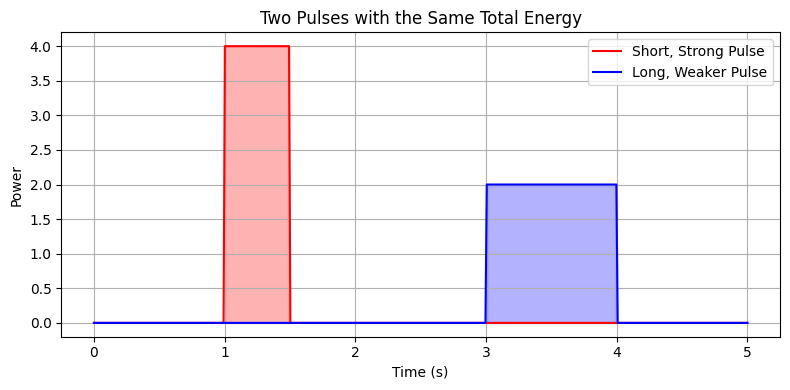

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Time axis for plotting
t = np.linspace(0, 5, 500)  # 0 to 5 seconds, with 500 samples

# Define a short, powerful pulse:
# - Occurs from t=1.0 to t=1.5 (duration 0.5 s)
# - Power = 4 units
# => Total energy (area) = power * duration = 4 * 0.5 = 2
short_pulse = np.zeros_like(t)
short_mask = (t >= 1.0) & (t < 1.5)
short_pulse[short_mask] = 4.0

# Define a longer, weaker pulse:
# - Occurs from t=3.0 to t=4.0 (duration 1.0 s)
# - Power = 2 units
# => Total energy (area) = 2 * 1.0 = 2
long_pulse = np.zeros_like(t)
long_mask = (t >= 3.0) & (t < 4.0)
long_pulse[long_mask] = 2.0

# Plot both pulses
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t, short_pulse, label='Short, Strong Pulse', color='red')
ax.plot(t, long_pulse, label='Long, Weaker Pulse', color='blue')

# Fill the area under each pulse for clarity
ax.fill_between(t, short_pulse, where=short_mask, color='red', alpha=0.3)
ax.fill_between(t, long_pulse, where=long_mask, color='blue', alpha=0.3)

ax.set_xlabel('Time (s)')
ax.set_ylabel('Power')
ax.set_title('Two Pulses with the Same Total Energy')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

## 🎹 Piano Scale Analogy: Resolving Overlapping Echoes with Frequency Encoding  

Imagine a pianist playing a **rising set of pitches** (a scale) on the piano, like this:  
**A → B → C → D → E → F → G → A**  

At first, the pianist plays this scale **with their right hand** alone, and everything is clear and distinct. But now, let’s add a twist:

---

### 🎼 1. Two Identical, Delayed & Overlapping Scales

Now, the pianist decides to **start playing the exact same scale with their left hand**—but **slightly later** than the right hand.  

- The **right hand** starts by playing the note **A** at **Time = 0 s**. 🎶 
- The **left hand** starts the same scale from **A** lightly later, at **Time = 0.2 s**, after the right hand has played the first few notes of the scale. 🎶

Since both hands are playing **the same scale**, but offset in time, when you listen to them **together**, the notes overlap! Instead of hearing a single clear melody, you now hear **two notes at the same time**, which blend together. 🎵  

🛑 **The Problem:**  
- To an **untrained ear**, this might sound like **a chaotic jumble of notes**. 🎵❓  
- If you only listen to the **raw sound**, you might **struggle to recognize** that two identical scales are being played.  
- Just like in radar, **overlapping echoes** can initially seem **inseparable**—blending together into a single indistinguishable return. 📡🎶  

---

### 🎵 2. Separating the Overlapping Scales Using Frequency  

Now, let’s think about **what actually happens at any given moment**:  

- The **right-hand scale** is at a higher frequency (higher pitch). ⬆️
- The **left-hand scale** is at a slightly lower frequency (lower pitch). ⬇️  

This means that even though the notes **overlap**, if you listen carefully to the sound at each instant, you can **still resolve the two scales** being played.

📡 **Radar Parallel:**  
- Instead of rising **sound pitches**, a **chirp** in radar is a pulse where the **frequency increases over time**. 🎶➡️📡  
- If two chirp echoes arrive at the receiver with slightly different delays (due to **targets at different distances**), they overlap but their **instantaneous frequencies** will always be **different** at any given moment.  
- This means that by analyzing the **instantaneous frequency** of the received signal, we can **separate overlapping echoes**—even when they mostly **overlap**! 🔍  


---

### 🎶 3. How the Ear (or Radar) Processes the Information  

🎵 **The Perfect Pitch Analogy:**  
Imagine a **musician with perfect pitch** listening to these overlapping scales. 🎼👂  
- Instead of hearing a **jumble of notes**, they focus on the **exact frequency at each moment** and can tell:  
  - “Right now, I hear **an F and an E**—so I must be hearing two separate scales, one slightly ahead of the other.” 🎶  
  - By carefully **analyzing the frequencies**, they can mentally **unravel** the two scales, even though the notes **overlap in time**.  

📡 **Radar Parallel:**  
- A **matched filter** in radar processing acts like a trained musician—it "listens" to the **instantaneous frequency** and determines which parts of the signal belong to which echo. 🎯🔊  
- This allows us to **separate overlapping chirp echoes**, just like a musician can recognize two scales being played slightly out of sync.  

---

🚀 **Just as a pianist can separate their two hands’ overlapping scales based on pitch differences, radar can separate overlapping chirp echoes by analyzing frequencies over time!** 🎼📡🎶  


## 🎶 Chirp Waveforms  

A **chirp waveform** is a special type of radar signal where the **frequency increases or decreases over time**. The key advantage of using chirps is that **matched filter processing** can **collect all the pulse energy** and **compress it into a sharp peak** at the correct echo delay. 🐦🎵

This allows us to **combine the high energy of a long pulse** with the **fine resolution of a short pulse**—a powerful technique in radar! **A rare moment of eating one's cake and having it too!** 🎂

In the next notebook, we’ll explore **how matched filtering works in practice** and how it enables us to **separate overlapping echoes** by analyzing their frequency content.  

### 🖥️ Try It Yourself: Simulating a Chirp  

Below, you’ll find a code snippet to **generate and visualize a chirp waveform**. Try experimenting with its key parameters:  
- **Pulse duration** (how long the chirp lasts)  
- **Total bandwidth** (the range of frequencies it sweeps through)

From these, the **chirp rate** is determined, which defines **how quickly the frequency changes** within the pulse. Play around with these values and observe how they affect the waveform! 🎵📡  

Also, based on your previous knowledge about the Nyquist theorem, how should we set the **sampling frequency for a chirped signal, where the frequency is not constant**? 🤔


Nyquist Rate:  20.0  MHz


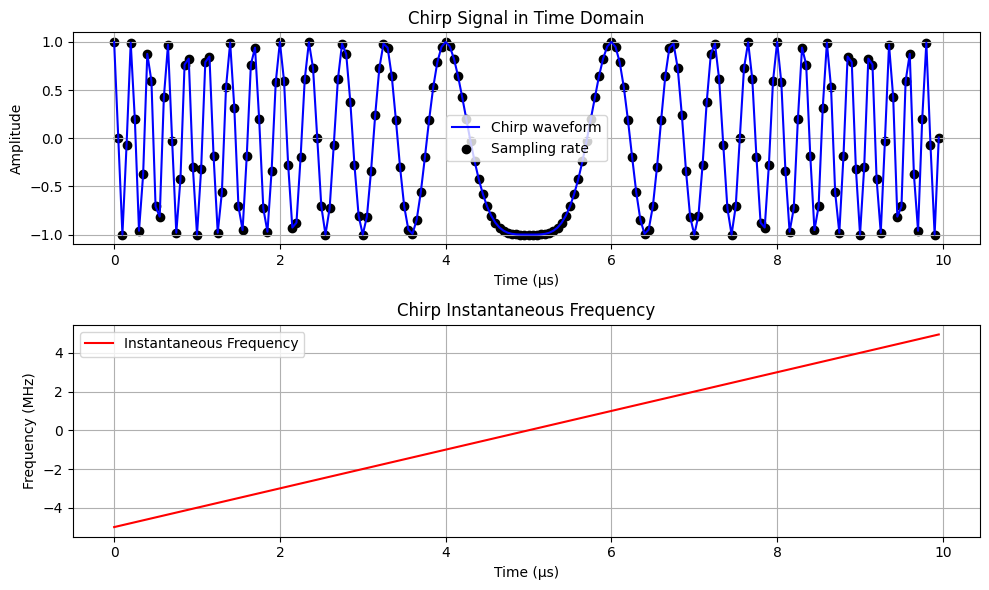

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# User input: Interactive parameter adjustments
pulse_duration = 10e-6  # Chirp duration in seconds
bandwidth = 10e6  # Bandwidth in Hz
sampling_rate = 2*bandwidth

def find_sr(freq):
    return max(freq)
    

# Function to generate and plot a chirp waveform
def plot_chirp(pulse_duration=10e-6, bandwidth=10e6, sampling_rate=50e6):
    """
    Parameters:
    - pulse_duration: Duration of the chirp pulse (seconds)
    - bandwidth: Total frequency sweep range (Hz)
    - sampling_rate: Sampling rate of the signal (Hz)
    """

    # Define start, end, and center frequencies
    f0 = -bandwidth/2  # Start frequency (Hz)
    f1 = bandwidth/2  # End frequency (Hz)
    fc = 0.0 # Center frequency (Hz)

    print("Nyquist Rate: ", sampling_rate * 1e-6, " MHz")
    # Time vector
    t = np.linspace(0, pulse_duration, int(sampling_rate * pulse_duration), endpoint=False)


    # Compute the chirp phase: φ(t) = 2π ( f0 * t + ( (f1 - f0) / (2 * T) ) * t^2 )
    k = (f1 - f0) / pulse_duration  # Chirp rate (Hz per second)
    phase = 2 * np.pi * ((f0+fc) * t + 0.5 * k * t**2)  # Integrating frequency to get phase

    # Generate chirp signal
    chirp_signal = np.cos(phase)

    # Compute instantaneous frequency: f_inst = f0 + k * t
    inst_freq = (f0+fc) + k * t  # Instantaneous frequency formula for a linear chirp
    

    # Plot results
    fig, axs = plt.subplots(2, 1, figsize=(10, 6))
    

    # Time-domain waveform
    axs[0].plot(t * 1e6, chirp_signal, label="Chirp waveform", color='b')
    axs[0].scatter(t * 1e6, chirp_signal, label="Sampling rate", color='k')
    axs[0].set_title("Chirp Signal in Time Domain")
    axs[0].set_xlabel("Time (µs)")
    axs[0].set_ylabel("Amplitude")
    axs[0].legend()
    axs[0].grid(True)

    # Instantaneous frequency
    axs[1].plot(t * 1e6, inst_freq * 1e-6, label="Instantaneous Frequency", color='r')
    axs[1].set_title("Chirp Instantaneous Frequency")
    axs[1].set_xlabel("Time (µs)")
    axs[1].set_ylabel("Frequency (MHz)")
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Generate and plot chirp
plot_chirp(pulse_duration, bandwidth, sampling_rate)
